Domain: Enhanced E-commerce Retail Transactions Analysis and Recommendation System

Objective:

The objective is to extract meaningful patterns, trends, and insights from customer transactions data to improve business strategies, enhance customer experience, and optimize operations.
Data Features:

Customer ID: Unique identifier for each customer.
Age: Age of the customer.
Gender: Gender of the customer.
Item Purchased: Description of the purchased item.
Category: Category to which the item belongs.
Purchase Amount (USD): The amount spent on the purchase.
Location: Geographic location of the customer.
Size: Size of the purchased item.
Color: Color of the purchased item.
Season: Season associated with the purchase.
Review Rating: Rating provided by the customer for the purchased item.
Subscription Status: Indicates whether the customer is subscribed to any service.
Payment Method: Method used by the customer to make the payment.
Shipping Type: Type of shipping chosen by the customer.
Discount Applied: Whether a discount was applied to the purchase.
Promo Code Used: Indicates whether a promo code was used.
Previous Purchases: Number of previous purchases made by the customer.
Preferred Payment Method: Customer's preferred payment method.
Frequency of Purchases: How frequently the customer makes purchases

ecommendation system  specifically a hybrid recommendation system that combines 
clustering and collaborative filtering. It aims to provide personalized product recommendations to 
customers based on their behavior and preferences, as well as similarities with other customers in the same cluster.



Tasks Mining:

1-analyze the association between customers using promo codes and their previous purchase behavior. 
The association rules provide insights into how the presence of a promo code may impact or be associated 
with subsequent purchases,as indicated by confidence and lift metrics.

2-provide  product recommendations to customers within a specific cluster
 based on their past purchase behavior. This can help businesses enhance 
 customer experience, increase sales, and optimize marketing strategies.
3-Apply similarity algorithms on "Payment Method" and "Preferred Payment Method" 
to group customers with similar payment preferences.or provide  customers  the most commons payment preferences

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import seaborn as sns

import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('new_file_with_conversion.csv')










# Print the updated DataFrame
df


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,44,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,32,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,53,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,79,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,61,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,12,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,21,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,4,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,4,Venmo,Weekly


In [2]:
df.drop_duplicates(subset= ["Customer ID"], inplace=True)

In [3]:
print(df.duplicated().any())

False


In [4]:
df.isnull().any()

Customer ID                 False
Age                         False
Gender                      False
Item Purchased              False
Category                    False
Purchase Amount (USD)       False
Location                    False
Size                        False
Color                       False
Season                      False
Review Rating               False
Subscription Status         False
Payment Method              False
Shipping Type               False
Discount Applied            False
Promo Code Used             False
Previous Purchases          False
Preferred Payment Method    False
Frequency of Purchases      False
dtype: bool

In [5]:




df.describe().round() 

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.0,3900.0,3900.0,3900.0,3900.0
mean,1950.0,44.0,60.0,4.0,27.0
std,1126.0,15.0,24.0,1.0,29.0
min,1.0,18.0,20.0,2.0,-19.0
25%,976.0,31.0,39.0,3.0,2.0
50%,1950.0,44.0,60.0,4.0,24.0
75%,2925.0,57.0,81.0,4.0,52.0
max,3900.0,70.0,100.0,5.0,80.0


In [6]:
df.loc[df['Previous Purchases'] <=-1, 'Previous Purchases'] = 0
df.describe().round() 


,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.0,3900.0,3900.0,3900.0,3900.0
mean,1950.0,44.0,60.0,4.0,29.0
std,1126.0,15.0,24.0,1.0,26.0
min,1.0,18.0,20.0,2.0,0.0
25%,976.0,31.0,39.0,3.0,2.0
50%,1950.0,44.0,60.0,4.0,24.0
75%,2925.0,57.0,81.0,4.0,52.0
max,3900.0,70.0,100.0,5.0,80.0


In [7]:
label_encoder = LabelEncoder()
categorical_cols = ['Subscription Status','Discount Applied','Promo Code Used','Frequency of Purchases']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

df    

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,1,Credit Card,Express,1,1,44,Venmo,3
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,1,Bank Transfer,Express,1,1,32,Cash,3
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,1,Cash,Free Shipping,1,1,53,Credit Card,6
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,1,PayPal,Next Day Air,1,1,79,PayPal,6
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,1,Cash,Free Shipping,1,1,61,PayPal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,0,Cash,2-Day Shipping,0,0,12,Venmo,6
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,0,PayPal,Store Pickup,0,0,21,Bank Transfer,1
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,0,Credit Card,Standard,0,0,4,Venmo,5
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,0,PayPal,Express,0,0,4,Venmo,6


DBSCAN Algorithm:

Input:
- Dataset D with data points
- Distance metric (e.g., Euclidean distance)
- Epsilon (eps), the maximum distance between two samples for one to be considered in the neighborhood of the other
- Minimum number of samples (min_samples) required to form a dense region

Output:
- Cluster assignments for each data point (cluster labels, noise labeled as -1)

Algorithm Steps:

1. Initialize an empty set for visited points and initialize an empty dictionary to store clusters.

2. For each unvisited point P in the dataset:
   a. Mark P as visited.
   b. Find all points in the epsilon neighborhood of P (including P itself).
   c. If the number of points in the neighborhood is less than min_samples, label P as noise (-1).
   d. Otherwise, create a new cluster C and assign P to C.
   e. For each point Q in the neighborhood:
      i. If Q is not visited, mark Q as visited.
      ii. Recursively apply steps b to e to expand the cluster C.

3. Continue this process until all points have been visited.


RandomForestRegressor Algorithm:

Input:
- Training dataset (X_train, y_train)
- Number of trees in the forest (n_estimators)
- Random subset of features to consider for splitting (max_features)
- Maximum depth of the tree (max_depth)
- Minimum number of samples required to split an internal node (min_samples_split)
- Minimum number of samples required to be at a leaf node (min_samples_leaf)

Output:
- Trained RandomForestRegressor model

Algorithm Steps:

1. Initialize an empty list to store individual decision trees: `forest`

2. For each tree in the forest (iterating `n_estimators` times):
    a. Sample a random subset of features (bootstrap) if `max_features` is not equal to the total number of features.
    b. Randomly select a subset of training samples (with replacement) to create a bootstrap sample.
    c. Build a decision tree:
        i. If `max_features` is specified, only consider the randomly selected subset of features at each split.
        ii. Split nodes based on the feature that provides the best reduction in mean squared error (MSE).
        iii. Stop splitting nodes if the tree reaches the specified maximum depth (`max_depth`) or the minimum number of samples required to split (`min_samples_split`).
        iv. Assign the average target value to the leaf nodes.

3. Output the trained RandomForestRegressor model containing all the decision trees.



# DBSCAN Clustering Algorithm
function DBSCAN(D, eps, min_samples):
    clusters = {}
    visited = set()

    for each unvisited point P in D:
        mark P as visited
        neighbors = find_neighbors(P, D, eps)
        
        if size(neighbors) < min_samples:
            label P as noise (-1)
        else:
            create a new cluster C
            add P to cluster C
            expand_cluster(P, C, neighbors, D, eps, min_samples)

    return clusters

function expand_cluster(P, C, neighbors, D, eps, min_samples):
    for each neighbor Q in neighbors:
        if Q is not visited:
            mark Q as visited
            new_neighbors = find_neighbors(Q, D, eps)
            
            if size(new_neighbors) >= min_samples:
                add new_neighbors to neighbors
                add Q to cluster C
                expand_cluster(Q, C, new_neighbors, D, eps, min_samples)

function find_neighbors(P, D, eps):
    neighbors = empty set
    
    for each point Q in D:
        if distance(P, Q) <= eps:
            add Q to neighbors
            
    return neighbors

# RandomForestRegressor Algorithm
function RandomForestRegressor(X_train, y_train, n_estimators, max_features, max_depth, min_samples_split, min_samples_leaf):
    forest = []

    for each tree in range(n_estimators):
        bootstrap_indices = random_sampling_with_replacement(X_train)
        X_bootstrap = X_train[bootstrap_indices]
        y_bootstrap = y_train[bootstrap_indices]

        tree = build_decision_tree(X_bootstrap, y_bootstrap, max_features, max_depth, min_samples_split, min_samples_leaf)
        add tree to forest

    return forest

function build_decision_tree(X, y, max_features, max_depth, min_samples_split, min_samples_leaf):
    tree = DecisionTree()

    if max_features is not None:
        random_features = random_subset_of_features(X, max_features)
        X = X[random_features]

    tree.root = split_node(X, y, max_depth, min_samples_split, min_samples_leaf)

    return tree

function random_subset_of_features(X, max_features):
    # Randomly select max_features from the total number of features in X
    return random_subset

function split_node(X, y, max_depth, min_samples_split, min_samples_leaf):
    # Implement splitting logic based on best feature and value to reduce MSE
    # Recursive splitting until max_depth or stopping conditions are met
    return node




Cluster Data:
      Customer ID  Age Gender Item Purchased     Category  \
28             29   54   Male        Handbag  Accessories   
84             85   52   Male           Coat    Outerwear   
196           197   38   Male          Boots     Footwear   
197           198   59   Male          Scarf  Accessories   
214           215   24   Male         Jacket    Outerwear   
271           272   65   Male     Sunglasses  Accessories   
317           318   58   Male        Sweater     Clothing   
347           348   36   Male        Sandals     Footwear   
363           364   55   Male         Shorts     Clothing   
424           425   66   Male        Sweater     Clothing   
435           436   51   Male           Coat    Outerwear   
525           526   51   Male           Coat    Outerwear   
548           549   36   Male       Backpack  Accessories   
592           593   60   Male          Boots     Footwear   
651           652   32   Male            Hat  Accessories   
664       

C:\Users\Osama\AppData\Local\Temp\ipykernel_3488\942024879.py:46: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sc = ax.scatter(cluster_subset['Review Rating'], cluster_subset['Previous Purchases'],


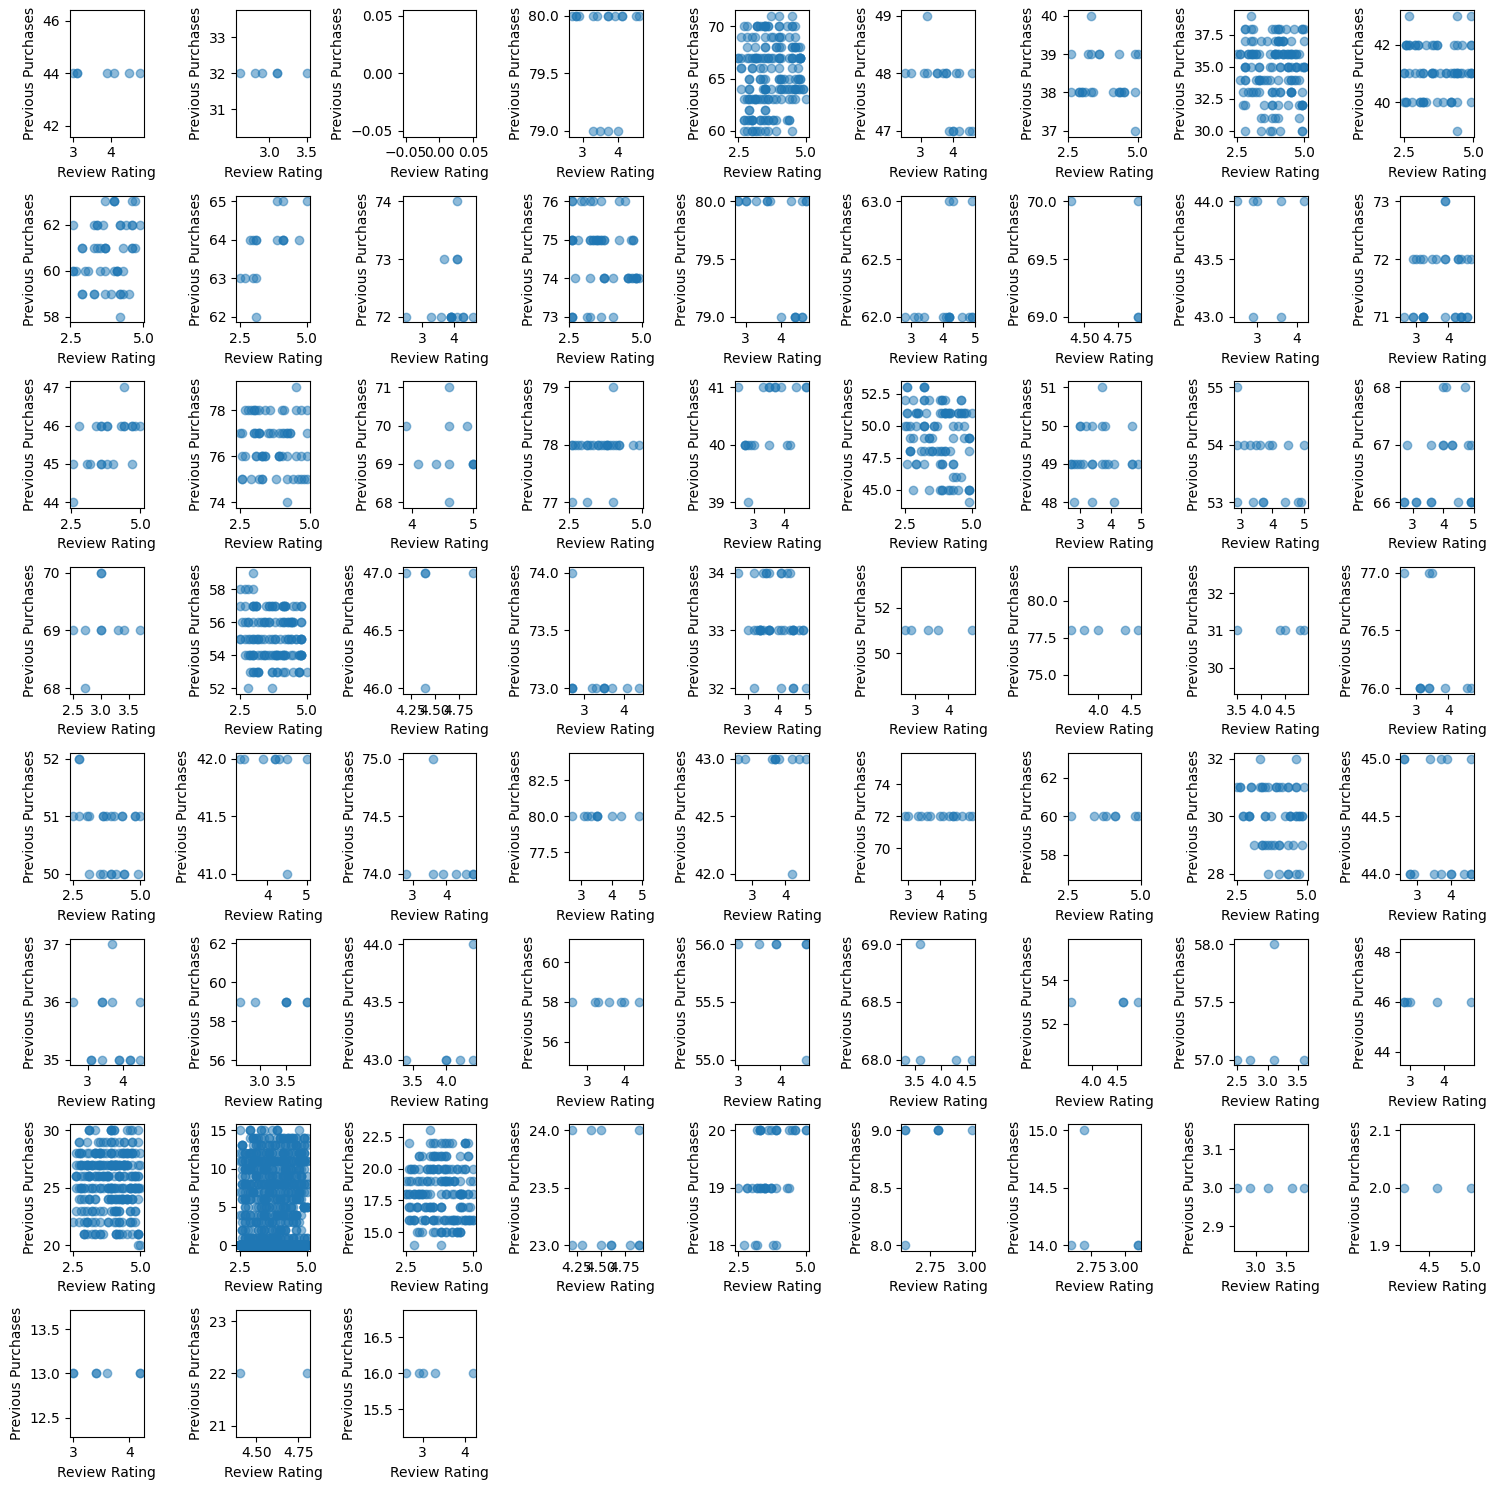

Item Purchased  Customer ID  Backpack  Belt  Blouse  Boots  Coat  Handbag  \
0                        29       0.0   0.0     0.0    0.0   0.0     71.0   
1                        85       0.0   0.0     0.0    0.0  72.0      0.0   
2                       197       0.0   0.0     0.0   71.0   0.0      0.0   
3                       198       0.0   0.0     0.0    0.0   0.0      0.0   
4                       215       0.0   0.0     0.0    0.0   0.0      0.0   
5                       272       0.0   0.0     0.0    0.0   0.0      0.0   
6                       318       0.0   0.0     0.0    0.0   0.0      0.0   
7                       348       0.0   0.0     0.0    0.0   0.0      0.0   
8                       364       0.0   0.0     0.0    0.0   0.0      0.0   
9                       425       0.0   0.0     0.0    0.0   0.0      0.0   
10                      436       0.0   0.0     0.0    0.0  72.0      0.0   
11                      526       0.0   0.0     0.0    0.0  71.0      0.0   

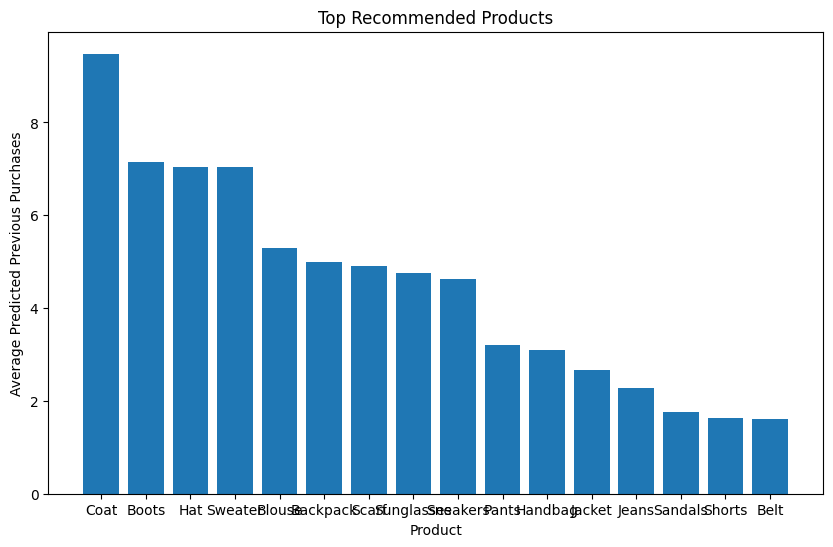

In [8]:
from sklearn.cluster import DBSCAN
import math
# Prepare the data for clustering
X_clustering = df[[ 'Review Rating', 'Previous Purchases', 'Frequency of Purchases']]
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=1, min_samples=5)
df['Cluster'] = dbscan.fit_predict(X_clustering)

# Filter out noise points (cluster labeled as -1)
filtered_data = df[df['Cluster'] != -1]


# Prepare the data for product recommendation within a specific cluster
cluster_number = 10 # Choose the cluster for which you want to make recommendations
cluster_data = df[df['Cluster'] == cluster_number]
# print(cluster_data)

user_item_matrix = cluster_data.pivot_table(index='Customer ID', columns='Item Purchased', values='Previous Purchases', fill_value=0)
# print(user_item_matrix)
# Reset index to convert 'Item Purchased' back to a regular column
user_item_matrix.reset_index(inplace=True)
# عرض البيانات في الفئة (Cluster)
print("Cluster Data:")
print(cluster_data)
# Visualize the data within all clusters

unique_clusters = df['Cluster'].unique()

num_clusters = len(unique_clusters)
num_cols = math.ceil(math.sqrt(num_clusters))
num_rows = math.ceil(num_clusters / num_cols)

# Create a square grid of subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axs array if it's a multi-dimensional array
axs = axs.flatten()

for i, cluster_label in enumerate(unique_clusters):
    cluster_subset = filtered_data[filtered_data['Cluster'] == cluster_label]
    
    # Select the current subplot
    ax = axs[i]
    
    # Scatter plot for the current cluster
    sc = ax.scatter(cluster_subset['Review Rating'], cluster_subset['Previous Purchases'],
                    label=f'Cluster {cluster_label}', cmap='viridis', alpha=0.5)
    
    ax.set_xlabel('Review Rating')
    ax.set_ylabel('Previous Purchases')
 

# Hide any remaining empty subplots
for i in range(num_clusters, num_cols * num_rows):
    axs[i].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Collaborative Filtering: Use RandomForestRegressor 
model = RandomForestRegressor(n_estimators=100, )



# Fit the model
target_columns = user_item_matrix.columns[1:]  # Exclude 'Customer ID'
X_train = user_item_matrix.drop('Customer ID', axis=1)  # Exclude 'Customer ID' from features
y_train = user_item_matrix  # Include all columns in y_train
model.fit(X_train, y_train.drop('Customer ID', axis=1))  # Exclude 'Customer ID' from y_train during model training
print(y_train)
# Make predictions for the purchase amounts of all products
predicted_purchase_all_products = model.predict(X_train)
print(predicted_purchase_all_products)
# Select the top products based on predicted Previous Purchases
top_products = user_item_matrix.columns[1:][predicted_purchase_all_products.mean(axis=0).argsort()[::-1][:30]]


print(top_products)
# Visualize the results
plt.figure(figsize=(10, 6))
plt.bar(top_products, predicted_purchase_all_products.mean(axis=0)[predicted_purchase_all_products.mean(axis=0).argsort()[::-1][:30]])
plt.xlabel('Product')
plt.ylabel('Average Predicted Previous Purchases')
plt.title('Top Recommended Products')
plt.show()

Algorithm Steps for FP-Growth:

Scan the dataset D to calculate the support of each item, which is the frequency of occurrence of each item in the dataset.

Remove items from the dataset that do not meet the minimum support threshold.

Sort the remaining items in descending order of support.

Create the root of the FP-Tree.

For each transaction in the dataset:
a. Sort the items in the transaction based on the order determined in step 3.
b. Insert the transaction into the FP-Tree, starting from the root and following the existing branches whenever possible. If a branch for an item does not exist, create a new branch.
c. Update the header table associated with each item in the transaction by incrementing the support count and linking it to the corresponding node in the FP-Tree.

For each item in the header table, create a conditional pattern base by following the linked nodes in the FP-Tree.

For each item in the header table, recursively perform the following steps:
a. Create a conditional FP-Tree using the conditional pattern base.
b. If the conditional FP-Tree is not empty, recursively mine it to generate frequent itemsets.
c. Combine the frequent itemsets with the current item to form new frequent itemsets.

Merge all the frequent itemsets generated from the previous step into a single set of frequent itemsets.

Return the set of frequent itemsets as the output.



Generating Association Rules with 'lift' Metric:
Input:
- frequent_itemsets DataFrame from Apriori
- Minimum lift threshold min_threshold

1. Initialize an empty list rules_list.

2. for each frequent_itemset in frequent_itemsets:
      a. Generate all possible rules from the frequent_itemset.
      b. Calculate confidence and lift for each rule.
      c. Filter rules based on min_threshold for lift.
      d. Add the filtered rules to rules_list.

3. Combine all rules into a single DataFrame rules.

Output:
- rules DataFrame containing association rules with confidence and lift values.



    support                                   itemsets
0  0.987436                       (Previous Purchases)
1  0.430000                      (Promo Code Used_Yes)
2  0.570000                       (Promo Code Used_No)
3  0.430000  (Previous Purchases, Promo Code Used_Yes)
4  0.557436   (Previous Purchases, Promo Code Used_No)

Association Rules for Promo Code Used impacting Previous Purchases:
             antecedents           consequents  confidence      lift
1  (Promo Code Used_Yes)  (Previous Purchases)         1.0  1.012724


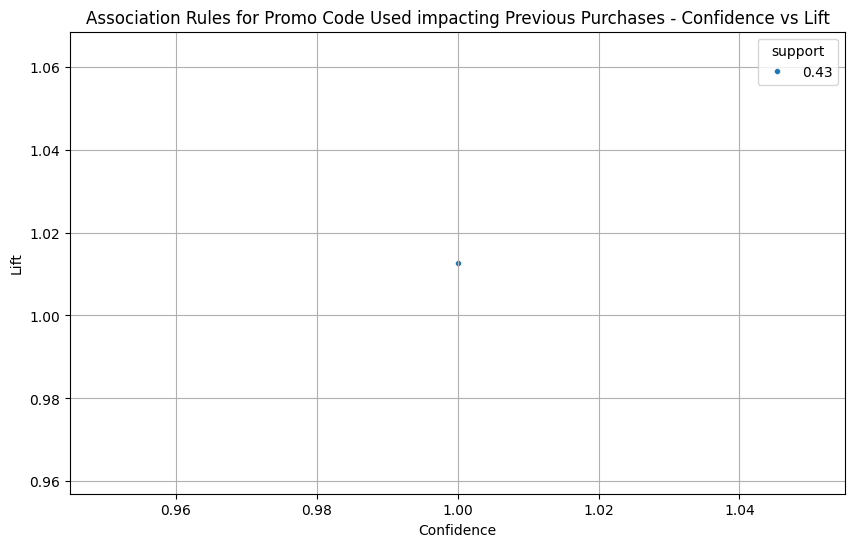

In [11]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules
import matplotlib.pyplot as plt
import seaborn as sns




# Encoding categorical variables
df_encoded = pd.get_dummies(df[['Promo Code Used', 'Previous Purchases',]])

# Ensure the encoded variables are boolean
df_encoded = df_encoded.astype(bool)

# FP-growth algorithm with a lower min_support value
frequent_itemsets = fpgrowth(df_encoded, min_support=0.1, use_colnames=True)
print(frequent_itemsets)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# Filter rules related to Promo Code Used and Purchase Amount (USD)
promo_previous_rules = rules[
    rules['antecedents'].apply(lambda x: 'Promo Code Used' in x)
    | rules['consequents'].apply(lambda x: 'Previous Purchases' in x)
]

print("\nAssociation Rules for Promo Code Used impacting Previous Purchases:")
print(promo_previous_rules[['antecedents', 'consequents', 'confidence', 'lift']])

# Visualization - Scatter plot for Promo Code Used
plt.figure(figsize=(10, 6))
sns.scatterplot(x='confidence', y='lift', size='support', data=promo_previous_rules)
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Association Rules for Promo Code Used impacting Previous Purchases - Confidence vs Lift')
plt.grid(True)
plt.show()


Function pairwise_distances(X):
    Input:
        X - a matrix or array containing data points (rows are data points, columns are features)

    Output:
        D - a matrix where D[i, j] represents the distance between data points i and j

    Steps:
    1. Initialize an empty matrix D with dimensions (number of rows in X) x (number of rows in X)
    2. For each pair of data points i and j in X:
        a. Compute the distance between data points i and j (e.g., Euclidean distance, Manhattan distance, etc.)
        b. Store the computed distance in D[i, j]
        c. If the distance metric is symmetric (distance(i, j) = distance(j, i)), update D[j, i] with the same value
    3. Return the matrix D


[[0.         0.48595501 1.45327773 0.64758372 0.59793234 0.79817428]
 [0.48595501 0.         1.62785869 0.75611683 0.36248048 0.67408843]
 [1.45327773 1.62785869 0.         1.61317015 1.48284538 1.46643432]
 [0.64758372 0.75611683 1.61317015 0.         0.46110707 1.2391785 ]
 [0.59793234 0.36248048 1.48284538 0.46110707 0.         0.67999978]
 [0.79817428 0.67408843 1.46643432 1.2391785  0.67999978 0.        ]]
Top  Payment Methods:
Preferred Payment Method
PayPal           0.402606
Cash             0.348917
Bank Transfer    0.336179
Debit Card       0.213807
Venmo            0.190354
Credit Card     -0.273931
dtype: float64


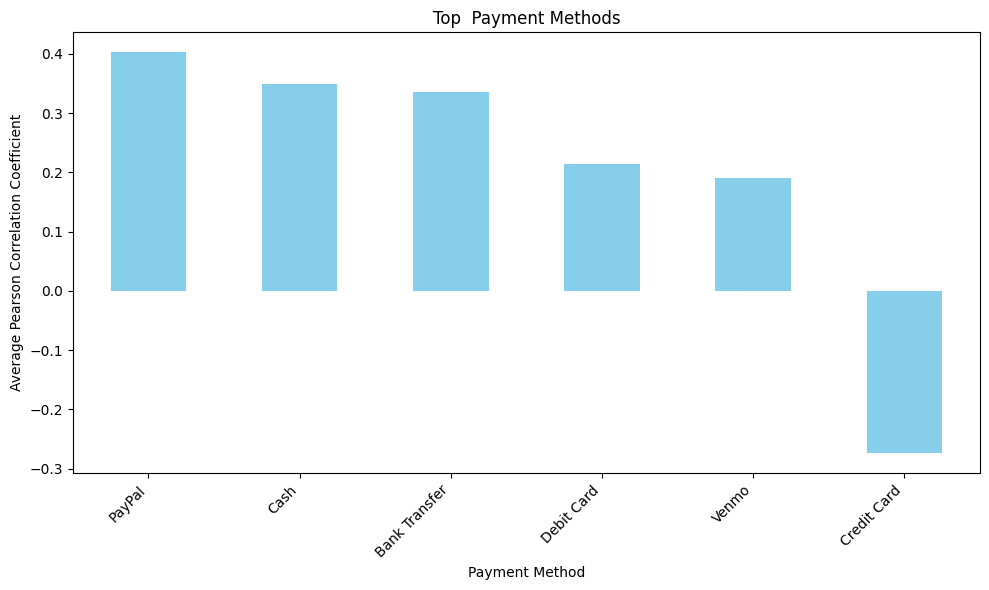

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

def preprocess_payment_data(df):
    # Select relevant columns
    df_relevance = df[['Payment Method', 'Preferred Payment Method']]

    # Convert 'Payment Method' and 'Preferred Payment Method' columns to categorical data types
    df['Payment Method'] = df['Payment Method'].astype('category')
    df['Preferred Payment Method'] = df['Preferred Payment Method'].astype('category')

    # Create a user-item matrix for payment methods
    user_payment_matrix = pd.crosstab(df['Payment Method'], df['Preferred Payment Method'])

    return user_payment_matrix

def calculate_payment_similarity(user_payment_matrix):
    # Check if the user-payment matrix is not empty
    if user_payment_matrix.empty:
        print("No payment data available. Please check your data.")
        return None

    # Calculate Pearson correlation between payment methods
    pearson_corr_payment = 1 - pairwise_distances(user_payment_matrix.T, metric='correlation')
    print( pairwise_distances(user_payment_matrix.T, metric='correlation'))
    # Get the similarity scores for all payment methods
    payment_method_similarities = pd.DataFrame(pearson_corr_payment, index=user_payment_matrix.columns, columns=user_payment_matrix.columns)

    # Exclude payment methods with no common usage (correlation coefficient of NaN)
    similar_payment_methods = payment_method_similarities.mean(axis=1).dropna().sort_values(ascending=False)

    return similar_payment_methods

def visualize_payment_similarity(similar_payment_methods):
    if similar_payment_methods is not None:
        # Display the top related payment methods
        print("Top  Payment Methods:")
        print(similar_payment_methods.head(10))

        # Visualization
        plt.figure(figsize=(10, 6))
        similar_payment_methods.head(10).plot(kind='bar', color='skyblue')
        plt.title('Top  Payment Methods')
        plt.xlabel('Payment Method')
        plt.ylabel('Average Pearson Correlation Coefficient')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    # Read the data from the CSV file
    df = pd.read_csv('new_file_with_conversion.csv')

    # Preprocess payment data
    user_payment_matrix = preprocess_payment_data(df)

    # Calculate payment method similarity
    similar_payment_methods = calculate_payment_similarity(user_payment_matrix)

    # Visualize payment method similarity
    visualize_payment_similarity(similar_payment_methods)
